# Computer Vision color spaces

### Import statements

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
!ls img

blue-flowers.jpg  blue-red-flowers.png	hsv.png  m.jpg	purple-flowers.jpg


In [ ]:
hsv=cv2.imread('img/hsv.png', cv2.IMREAD_COLOR)

### To edit an image making a copy of it is always a good idea!

In [18]:
def imshow(img):
    plt.figure(figsize = (10,7))
    plt.imshow(img)

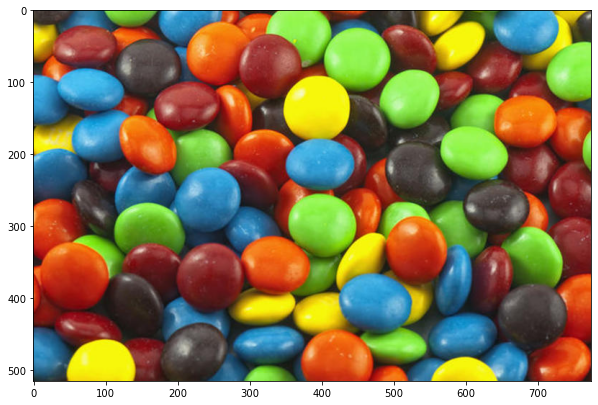

In [26]:
# Load an image
image=cv2.imread('img/m.jpg')
image_copy=image.copy()
image_copy=cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
imshow(image_copy)       


[Hint](# "Numpy .copy function") 

## Color Spaces

### BGR Spliting the color channels

In [27]:
# Load a color image and split in is different B, G and R channels
img_bgr=cv2.cvtColor(image_copy,cv2.COLOR_RGB2BGR)
B,G,R =cv2.split(img_bgr)


[Hint](# "cv2.split") 

In [28]:
# Show each channel channel on screen
B

array([[75, 72, 66, ..., 55, 56, 58],
       [71, 68, 64, ..., 52, 59, 64],
       [68, 65, 61, ..., 73, 82, 88],
       ...,
       [46, 49, 49, ..., 19, 21, 23],
       [44, 44, 47, ..., 19, 21, 23],
       [41, 42, 43, ..., 19, 21, 23]], dtype=uint8)

In [29]:
G

array([[ 80,  77,  71, ..., 120,  98,  84],
       [ 78,  75,  69, ...,  96,  87,  84],
       [ 75,  72,  68, ...,  88,  93,  99],
       ...,
       [ 45,  46,  47, ...,  25,  27,  28],
       [ 42,  42,  44, ...,  25,  27,  28],
       [ 38,  39,  41, ...,  25,  27,  28]], dtype=uint8)

In [30]:
R

array([[ 89,  86,  80, ..., 134, 111,  98],
       [ 87,  84,  78, ..., 109,  98,  95],
       [ 84,  81,  77, ...,  97, 101, 107],
       ...,
       [ 31,  31,  29, ...,  48,  50,  53],
       [ 31,  31,  30, ...,  48,  50,  53],
       [ 30,  31,  31, ...,  48,  50,  53]], dtype=uint8)

#### Merging the color channels

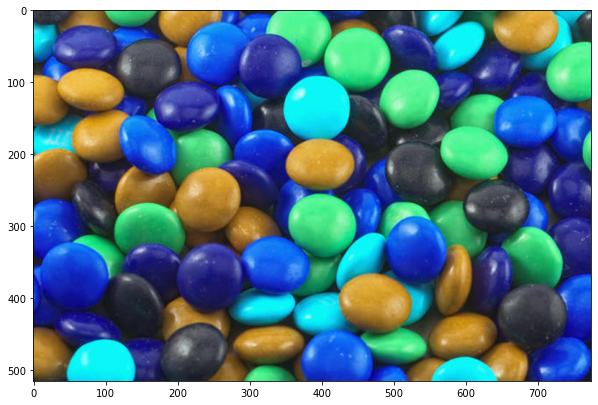

In [32]:
# Modify a channel and then merge them all again
merg=cv2.merge((B,G,R))
imshow(merg)

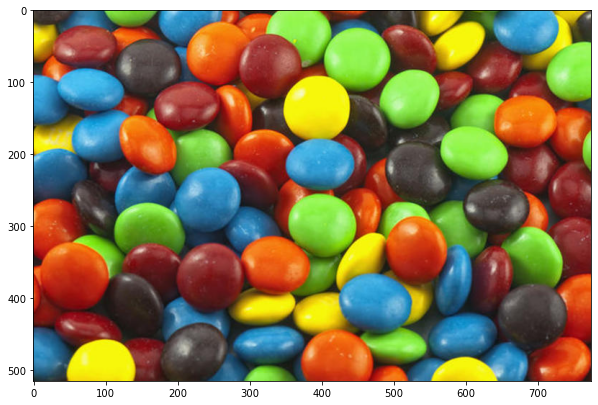

In [33]:
merg=cv2.merge((R,G,B))
imshow(merg)

[Hint](# "cv2.merge") 

(515, 775, 3)


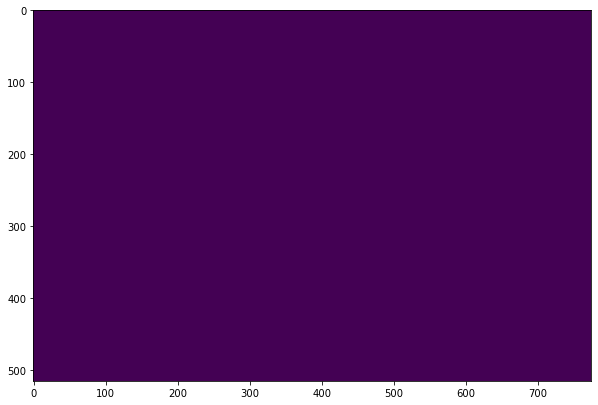

In [57]:
# Create a black canvas with the same size as the image you loaded
print(image_copy.shape)
black_canvas=np.zeros(image_copy.shape[:2], dtype = "uint8")
imshow(black_canvas)

In [58]:
black_canvas

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

[Hint](# "use numpy np.zeros function with the img.shape[:2]") 

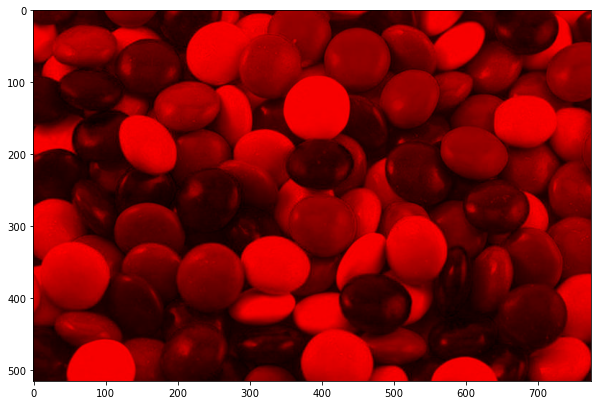

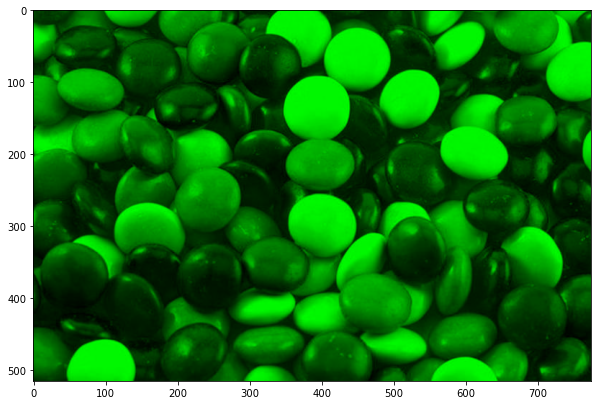

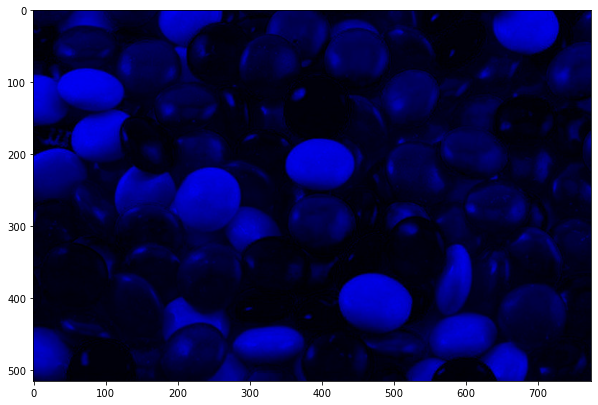

In [59]:
# Merge each channel with the black canvas 
# So you will end up with 3 images: (Red,Black,Black), (Black,Green,Black) and (Black,Black,Blue) 
# Assuming you are working with RGB, but BGR is also fine
test_1=cv2.merge((R,black_canvas,black_canvas))
test_2=cv2.merge((black_canvas,G,black_canvas))
test_3=cv2.merge((black_canvas,black_canvas,B))
imshow(test_1)
imshow(test_2)
imshow(test_3)

[Hint](# "cv2.merge") 

### HSV: Hue Saturation Value

#### M&Ms challenge!

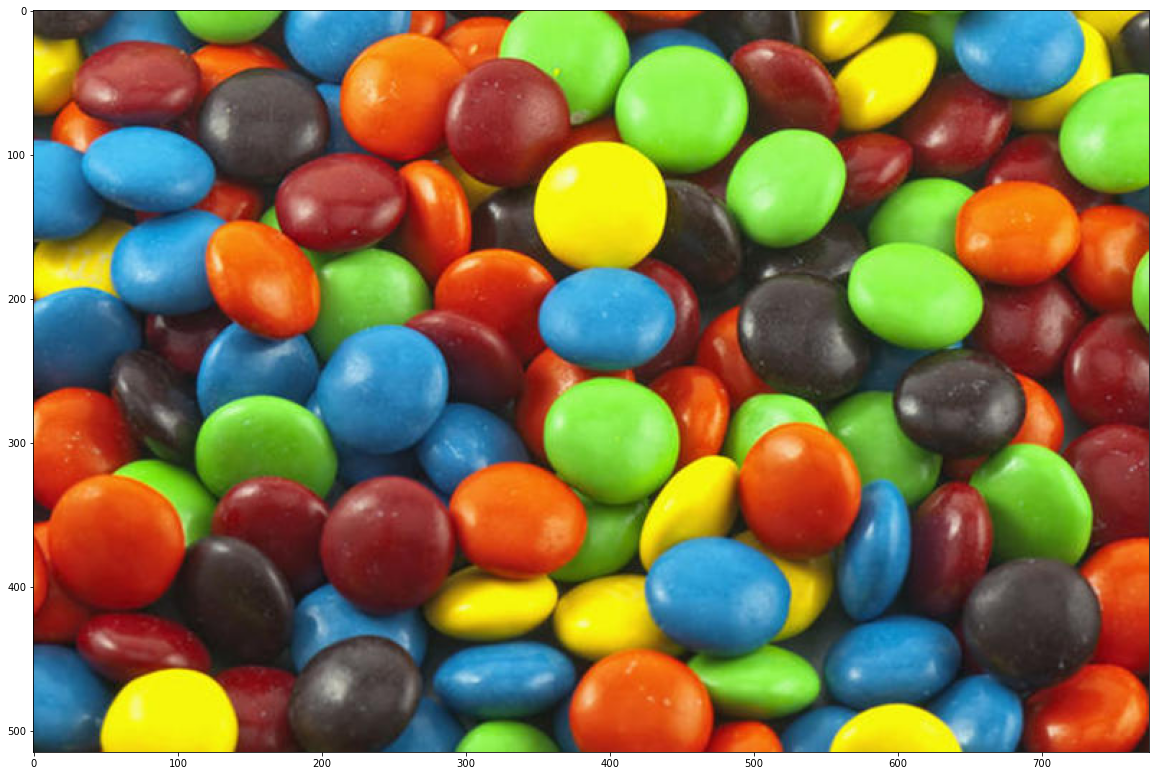

In [13]:
# Use the image below and convert it from BGR to HSV
img = cv2.imread('img/m.jpg')
img_=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,15));
#plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));
plt.imshow(img_)

In [9]:
# Split the H,S and V channels 
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
H,S,V =cv2.split(hsv)

In [52]:
H

array([[11, 11, 11, ..., 25, 23, 20],
       [13, 13, 11, ..., 23, 22, 19],
       [13, 13, 13, ..., 19, 17, 17],
       ...,
       [92, 95, 93, ...,  6,  6,  5],
       [95, 95, 95, ...,  6,  6,  5],
       [98, 98, 95, ...,  6,  6,  5]], dtype=uint8)

In [53]:
S

array([[ 40,  42,  45, ..., 150, 126, 104],
       [ 47,  49,  46, ..., 133, 101,  83],
       [ 49,  50,  53, ...,  63,  48,  45],
       ...,
       [ 83,  94, 104, ..., 154, 148, 144],
       [ 75,  75,  92, ..., 154, 148, 144],
       [ 68,  67,  71, ..., 154, 148, 144]], dtype=uint8)

In [54]:
V

array([[ 89,  86,  80, ..., 134, 111,  98],
       [ 87,  84,  78, ..., 109,  98,  95],
       [ 84,  81,  77, ...,  97, 101, 107],
       ...,
       [ 46,  49,  49, ...,  48,  50,  53],
       [ 44,  44,  47, ...,  48,  50,  53],
       [ 41,  42,  43, ...,  48,  50,  53]], dtype=uint8)

[Hint](# "cv2.cvtColor") 

In [10]:
# Create a mask to filter out the Blue M&Ms (remember you need a lower and upper range)
# Make a copy of the hsv image and apply the mask to it, then display the image
low_blue=np.array([60,100,0])
upper_blue=np.array([130,255,255])
mask = cv2.inRange(hsv, low_blue, upper_blue)


In [18]:
result = cv2.bitwise_and(hsv, hsv, mask=mask)
cv2.imshow('Frame', img)
cv2.imshow('mask', mask)
cv2.imshow('Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


[Hint](# "cv2.inRange") 

In [ ]:
# Repeat the same but now with the greens


In [ ]:
# Now combine both masks togheter so we can see all greens and blues in the same image!


In [ ]:
# Now lets combine both masks but also some opacity, we want to be able to see all M&Ms but
# Blues and greens will show as int he image above while the other colors will be faded out with some opacity
# You just need to add alpha to apply opacity to the dark parts of the mask, then display the image



[Hint](# "cv2.addWeighted") 

In [ ]:
# Below you will find an example with oranges and greens just for reference so you can see what we want to accomplish
# In this example the oranges are not perfect, and it can be improved a lot easily.

## Mini project

### Level 1

#### Ball tracker

1. Given an image with a ball on it isolate the ball

In [6]:
video=cv2.VideoCapture(0)
while True:
    _,frame = video.read()
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([50,0,0])
    
    upper_red =np.array ([255,255,255])
    
    mask=cv2.inRange(hsv,lower_red,upper_red)
    result=cv2.bitwise_and(frame,frame,mask=mask)
    
    cv2.imshow('Frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('result',result)
    if  cv2.waitKey(30) & 0xFF == ord('q'):
        break
  
    
cv2.destroyAllWindows()
video.release()
    
    
    
    

### Level 2

#### Ball tracker

1. Make it track a ball in real time (either with a video or a webcam)

### Level 3

#### Ball Tracker

1. Can you make it track two or more different color balls at the same time?